# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

import cv2
from random import randint
# Visualizations will be shown in the notebook.
%matplotlib inline
# TODO: Fill this in based on where you saved the training and testing data

training_file = "/Users/abdullahalsheeha/Downloads/Traffic-Sign-Classifier/data/train.p"
validation_file="/Users/abdullahalsheeha/Downloads/Traffic-Sign-Classifier/data/valid.p"
testing_file = "/Users/abdullahalsheeha/Downloads/Traffic-Sign-Classifier/data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
classes_names = pd.read_csv('signnames.csv')

In [2]:
classes_names

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(classes_names['ClassId'])

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


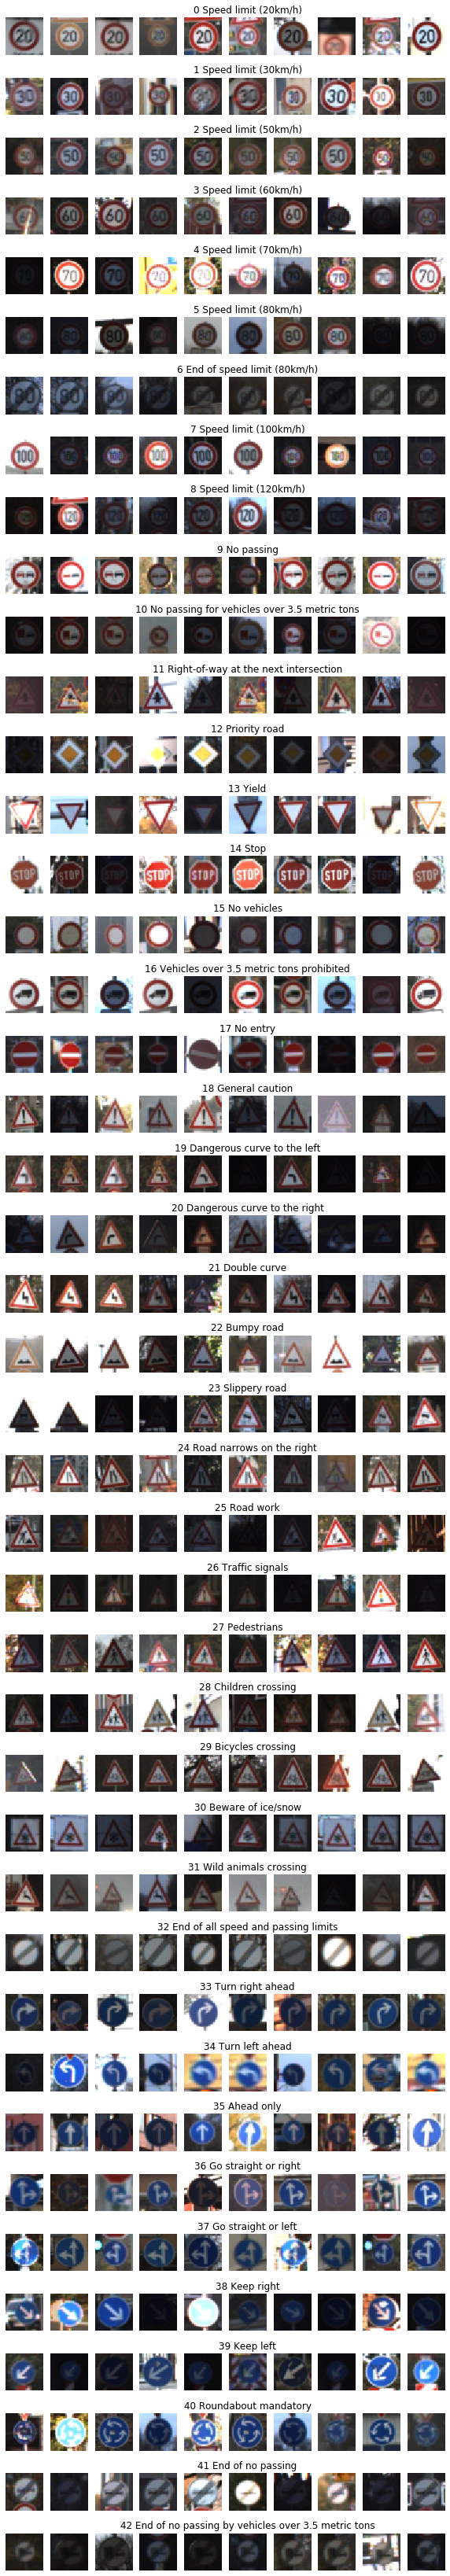

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
cols = 10
f, ax = plt.subplots(n_classes, cols, figsize=(10, 60))
class_elements = []
for i in range(n_classes):
    x_current_class = X_train[y_train == i]
    random_indexes = [randint(0, len(x_current_class)-1) for p in range(0, cols)]
    for j in range(cols):
        ax[i][j].imshow( x_current_class[random_indexes[j]] )
        ax[i][j].axis('off')
        if j == cols // 2:
            temp_title = "%d %s" % (i, classes_names['SignName'][i])
            ax[i][j].set_title(temp_title)
    class_elements.append(len(x_current_class))

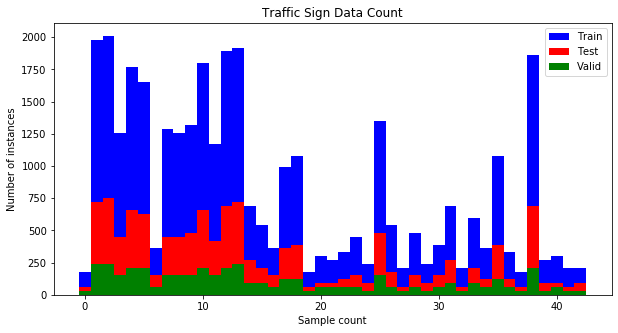

In [5]:
a, Y_train = np.unique(y_train, return_counts=True)
_, Y_test = np.unique(y_test, return_counts=True)
_, Y_valid = np.unique(y_valid, return_counts=True)

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(a, Y_train, color ='blue',  
        width = 1, label='Train') 
plt.bar(a, Y_test, color ='red',  
        width = 1, label='Test')
plt.bar(a, Y_valid, color ='green',  
        width = 1, label='Valid')    
plt.xlabel("Sample count") 
plt.ylabel("Number of instances")
plt.legend(('Train', 'Test', 'Valid'))
plt.title("Traffic Sign Data Count") 
plt.show() 

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
X_train = (X_train)/255.0
X_train, y_train = shuffle(X_train, y_train)
X_valid = (X_valid)/255.0
X_test = (X_test)/255.0

### Model Architecture

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(20, (3, 3), input_shape= (X_train.shape[1], X_train.shape[2], X_train.shape[3]), padding='valid', activation='relu'),
    #tf.keras.layers.Dropout(0.5),

    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(50, (3, 3), padding='valid', activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Conv2D(256, (3, 3), padding='valid', activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Dropout(0.5),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation='relu'),
    #tf.keras.layers.Dropout(0.5),    
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.5),   
    #tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(43, activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 20)        560       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 50)        9050      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 50)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1800)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               9

In [9]:
model.fit(X_train, y_train, batch_size=128, epochs=15, validation_data=(X_valid, y_valid))

Epoch 1/15
272/272 [==============================] - 16s 58ms/step - loss: 1.8458 - accuracy: 0.4751 - val_loss: 0.7176 - val_accuracy: 0.7814
Epoch 2/15
272/272 [==============================] - 16s 58ms/step - loss: 0.5692 - accuracy: 0.8231 - val_loss: 0.3733 - val_accuracy: 0.8891
Epoch 3/15
272/272 [==============================] - 16s 57ms/step - loss: 0.3231 - accuracy: 0.9014 - val_loss: 0.2927 - val_accuracy: 0.9109
Epoch 4/15
272/272 [==============================] - 16s 57ms/step - loss: 0.2229 - accuracy: 0.9331 - val_loss: 0.2509 - val_accuracy: 0.9188
Epoch 5/15
272/272 [==============================] - 15s 57ms/step - loss: 0.1675 - accuracy: 0.9500 - val_loss: 0.2178 - val_accuracy: 0.9342
Epoch 6/15
272/272 [==============================] - 17s 62ms/step - loss: 0.1301 - accuracy: 0.9601 - val_loss: 0.1922 - val_accuracy: 0.9401
Epoch 7/15
272/272 [==============================] - 18s 65ms/step - loss: 0.1101 - accuracy: 0.9664 - val_loss: 0.2002 - val_accuracy:

In [10]:
model.evaluate(X_test, y_test)

395/395 [==============================] - 2s 5ms/step - loss: 0.2423 - accuracy: 0.9431


[0.24234656989574432, 0.9430720210075378]

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.



### Load and Output the Images

In [11]:
img_batch = tf.keras.preprocessing.image.img_to_array(X_test[0])
img_batch = tf.expand_dims(img_batch, 0)
  #label_batch = y_test[i]

pred_img = model.predict(img_batch)
pred_img = tf.squeeze(pred_img).numpy()
pred_label = np.argmax(pred_img, axis=-1)
pred_class = classes_names.loc[pred_label]
pred_class['ClassId']

16

### Predict the Sign Type for Each Image

In [12]:
def predict_img(img):
    img_batch = tf.keras.preprocessing.image.img_to_array(img)
    img_batch = tf.expand_dims(img_batch, 0)
      #label_batch = y_test[i]

    pred_img = model.predict(img_batch)
    pred_img = tf.squeeze(pred_img).numpy()
    pred_label = np.argmax(pred_img, axis=-1)
    return pred_label


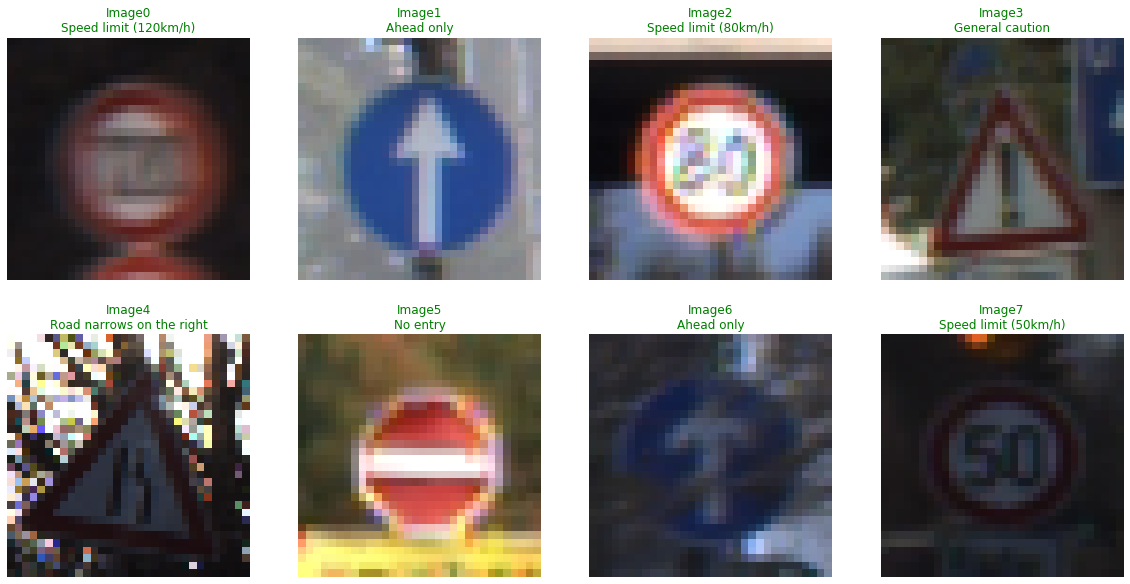

In [13]:


cols = 4
rows = 2

random_indexes = [randint(0, len(X_test)-1) for p in range(0, cols * rows)]


x_test = X_test[random_indexes]
y_test_ = y_test[random_indexes]

f, ax = plt.subplots(rows, cols, figsize=(20, 10))
for i in range(rows):
    for j in range(cols):
        idx = i * cols + j
        temp_img = x_test[idx]
        predicted_label = predict_img(temp_img)
        ax[i][j].imshow(temp_img)
        
        color = 'red'
        if y_test_[idx] == predicted_label:
            color = 'green'
        pred_class = classes_names.loc[predicted_label]   
        title = "Image" + str(idx) + "\n" + pred_class['SignName']
        ax[i][j].set_title(title, color=color)
        ax[i][j].axis('off')
        
        

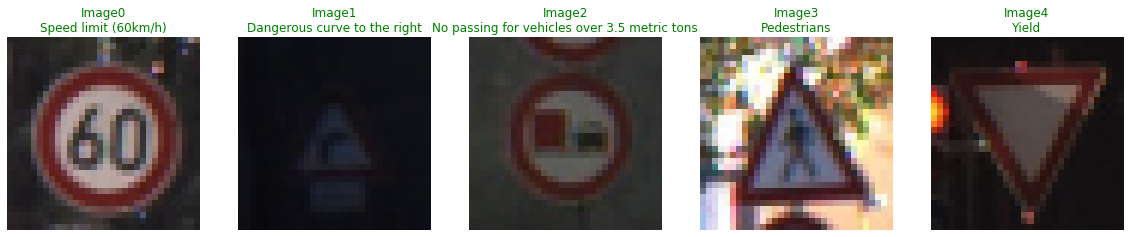

In [17]:
import matplotlib.image as mpimg
path = '/Users/abdullahalsheeha/Downloads/Traffic-Sign-Classifier/'
image = [path + 'img_test/Speed limit (60km_h).jpg',
         path + 'img_test/Dangerous curve to the right.jpg', 
         path + 'img_test/No passing for vehicles over 3.5 metric tons.jpg', 
         path + 'img_test/Pedestrians.jpg',
         path + 'img_test/Yield.jpg']

labels = [3, 20, 10, 27, 13] 

f, ax = plt.subplots(1, len(image), figsize = (20, 10))

correct_predictions = 0
for i in range(len(image)):
    img = mpimg.imread(image[i])
    img = cv2.resize(img, (32, 32))
    ax[i].imshow(img, cmap=plt.get_cmap('gray'))
    pred = predict_img(img)
    
    color = 'red'
    if labels[i] == pred:
        color = 'green'
        correct_predictions += 1
    title = "Image" + str(i) + "\n" + classes_names['SignName'][pred]
    ax[i].set_title(title, color=color)

    ax[i].axis('off')



### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
accuracy = correct_predictions / len(image) * 100

print( "Accuracy: {:2.2f} %".format(accuracy) )

Accuracy: 100.00 %
